In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV 

# DataFrame № 1 💎

Будем решать задачу предсказания цены бриллианта в зависимости от его характеристик

https://www.kaggle.com/datasets/shivam2503/diamonds

In [3]:
data = pd.read_csv('diamonds.csv')

In [4]:
data.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [5]:
data.shape

(53940, 11)

✅ Есть ли в наборе данных пропущенные значения?

In [6]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [7]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


✅ Есть ли в наборе данных признаки, не несущие полезной информации?

In [9]:
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
data = data.drop("Unnamed: 0", axis = 1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


✅ Дополнительно происследуйте данные, которые кажутся интересными на ваш взгяд

Представим, что мы не владеем информацией о том, как устроены наши данные.

In [11]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [12]:
data["cut"].nunique()

5

In [13]:
data["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

✅ Исследуем вещественные признаки. Посмотрим на матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной.

- Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [15]:
data_corr = data.drop(['cut', 'color', 'clarity'], axis = 1)

In [16]:
data_corr.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [17]:
data_corr.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

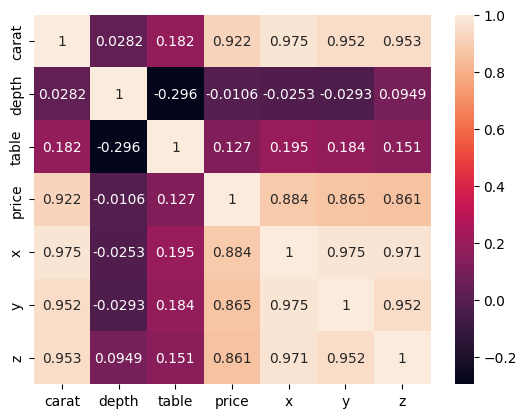

In [18]:
sns.heatmap(data_corr.corr(), annot = True, fmt = '.3g')

✅ Работаем с категориальными признаками. Закодируйте все категориальные признаки.

In [19]:
from sklearn.preprocessing import OneHotEncoder
#LABEL_codeng
#ordinal codeng
ohe = OneHotEncoder(sparse_output=True, drop='first')


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [21]:
X_object = data.select_dtypes('object') # Выделили данные типа обжект
ohe.fit(X_object) #Применили onehot кодирование

OneHotEncoder(drop='first')

In [22]:
codes = ohe.transform(X_object).toarray() #преобразовали в массив

In [23]:
codes

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [24]:
feature_names = ohe.get_feature_names_out(['cut', 'color', 'clarity'])
feature_names

array(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'], dtype=object)

In [25]:
data_coded = pd.concat([data.select_dtypes(exclude = 'object'), pd.DataFrame(codes,
                                                            columns=feature_names).astype(int)], axis = 1) #Выбираем тип обжект и exclude мы от них избавляемся

In [26]:
data_coded

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


✅ Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [27]:
X = data_coded.drop('price', axis=1)
y = data['price']

In [28]:
np.random.seed(10)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

✅ Отмасштабируйте вещественные признаки. Объясните почему это необходимо?

In [ ]:
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train 
#всегда масштабировать вещественынные признаки, для нормализации обучения , тк веса могут получиться неравномерные 
#мы делаем это для того чтобы все признаки были равноправны на этапе до обучения(грубо говоря мы делаем это для ууменьешния весов)

array([[ 0.47663651,  0.59382772, -0.2010722 , ..., -0.54398766,
        -0.27109753, -0.32179353],
       [ 0.92223735, -0.31901551, -0.2010722 , ..., -0.54398766,
        -0.27109753, -0.32179353],
       [-0.56309876,  0.4533903 ,  0.69922653, ..., -0.54398766,
        -0.27109753, -0.32179353],
       ...,
       [-0.9874805 , -0.10835938, -1.10137094, ..., -0.54398766,
        -0.27109753, -0.32179353],
       [-0.56309876,  0.52360901,  1.1493759 , ..., -0.54398766,
        -0.27109753, -0.32179353],
       [ 1.00711369,  0.38317159,  0.24907717, ..., -0.54398766,
        -0.27109753, -0.32179353]])

✅ Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('MSE train: ', mean_squared_error(y_train, lin_reg.predict(X_train)))
print('MSE test: ', mean_squared_error(y_test, lin_reg.predict(X_test)))
#на тесте ошибка больше чем на трейне 

MSE train:  1268454.9559615587
MSE test:  1303126.7488467365


✅ Выведите полученные оценки коэффициентов LinearRegression. Проанализируйте полученные коэффициенты.

In [33]:
coef_df = pd.DataFrame(lin_reg.coef_, index = X.columns, columns = ['coef'])
coef_df.sort_values(by=['coef'])

,coef
x,-959.001979
color_J,-513.635437
color_I,-431.944388
color_H,-349.279490
z,-238.038613
color_G,-190.841862
color_F,-102.443444
color_E,-78.915265
depth,-73.111300
table,-67.588760


✅ Можно заметить из анализа корреляционной матрицы, что между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы мультиколлинеарности. 

Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. 

- Попробуйте провести регуляризацию модели, чтобы избавиться от данной проблемы: Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10.
- Сильно ли уменьшились веса?

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

In [36]:
lasso = linear_model.Lasso(alpha = 10)
lasso.fit(X_train, y_train)
print('MSE train lasso: ', mean_squared_error(y_train, lasso.predict(X_train)))
print('MSE test lasso: ', mean_squared_error(y_test, lasso.predict(X_test)))

MSE train lasso:  1330335.8661404853
MSE test lasso:  1367367.040854752


MSE train:  113068118.91581373
MSE test:  111972473.27252065

In [37]:
ridge = linear_model.Ridge(alpha = 10)
ridge.fit(X_train, y_train)
print('MSE train ridge: ', mean_squared_error(y_train, ridge.predict(X_train)))
print('MSE test ridge: ', mean_squared_error(y_test, ridge.predict(X_test)))

MSE train ridge:  1268581.4112912414
MSE test ridge:  1303825.362568864


In [38]:
coef_df_lasso = pd.DataFrame(lasso.coef_, index = X.columns, columns = ['coef_lasso'])
coef_df_lasso.sort_values(by=['coef_lasso'])

,coef_lasso
x,-488.898100
color_J,-453.057340
color_I,-360.543701
color_H,-275.572789
z,-194.282630
color_G,-112.156115
depth,-86.418657
table,-76.384212
color_F,-36.147716
color_E,-7.884083


In [39]:
coef_df_ridge = pd.DataFrame(ridge.coef_, index = X.columns, columns = ['coef_ridge'])
coef_df_ridge.sort_values(by=['coef_ridge'])

,coef_ridge
x,-906.609607
color_J,-512.295374
color_I,-430.678540
color_H,-348.399611
z,-247.347874
color_G,-190.282234
color_F,-102.265672
color_E,-78.503666
depth,-70.737168
table,-67.727091


In [39]:
df = pd.concat([coef_df, coef_df_lasso, coef_df_ridge], axis = 1)
df

,coef,coef_lasso,coef_ridge
carat,5268.334845,4789.301380,5231.924260
depth,-73.111300,-86.418657,-70.737168
table,-67.588760,-76.384212,-67.727091
x,-959.001979,-488.898100,-906.609607
y,80.663235,-0.000000,71.895193
z,-238.038613,-194.282630,-247.347874
cut_Good,180.155737,55.057846,180.791648
cut_Ideal,421.771664,216.790822,423.061718
cut_Premium,345.464522,157.065492,346.348511
cut_Very Good,319.333157,149.175622,320.827107


✅ Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции  𝛼: 0.1, 1, 10, 100, 200 – обучите Lasso- и Ridge-регрессии. 

Понаблюдайте за изменением евклидовой нормы весов. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? 

In [43]:
alfas = [0.01, 0.1, 1, 10, 100]
lasso_euclid = []
ridge_euclid = []

In [44]:
print("Lasso Euclidean norms:")
print()
for i in alfas:
    lasso = linear_model.Lasso(alpha = i)
    lasso.fit(X_train, y_train)
    lasso_euclid.append(np.linalg.norm(lasso.coef_))
    
print(lasso_euclid)

print('----------')
print("Ridge Euclidean norms:")
print()

for i in alfas:
    ridge = linear_model.Ridge(alpha = i)
    ridge.fit(X_train, y_train)
    ridge_euclid.append(np.linalg.norm(ridge.coef_))
    
print(ridge_euclid)

Lasso Euclidean norms:

[6635.824425010106, 6622.34789030959, 6496.72103662704, 5346.0902301210435, 3844.57503082443]
----------
Ridge Euclidean norms:

[6637.260522385605, 6636.589561423073, 6629.894491317052, 6564.347717436102, 6015.4000270732695]


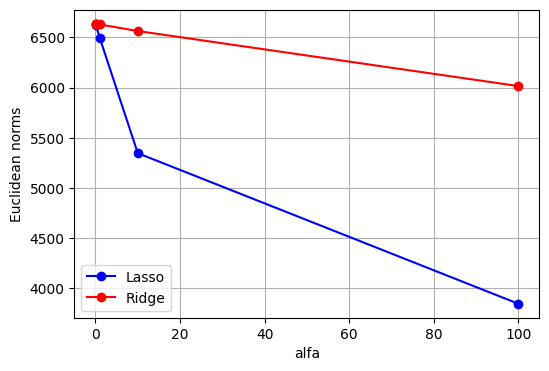

In [45]:
x = alfas
fig, ax = plt.subplots(figsize=(6,4))
y1 = lasso_euclid
y2 = ridge_euclid

#Lasso
ax.plot(x, y1, color = 'blue', marker = 'o', label = 'Lasso')

#Ridge
ax.plot(x, y2, color = 'red', marker = 'o', label = 'Ridge')

ax.grid(True)
plt.xlabel('alfa')
plt.ylabel('Euclidean norms')
leg = ax.legend(loc='lower left', frameon = True)

✅ В зависимости от значения параметра  𝛼 в Lasso-регрессии зануляются разные оценки коэффициентов. Подберите оптимальное значение коэффициента регуляризации по тренировочной выборке.

In [48]:
reg = LassoCV(cv = 5, n_alphas = 10, random_state = 0).fit(X_train, y_train) # cv = 5 тк [0.01, 0.1, 1, 10, 100]

reg_alph = reg.alphas_
array = reg.mse_path_

a=[]
for i in range(len(array)):
    m = np.mean(array[i])
    a.append(m)
    
d1 = {"MSE_1": pd.Series(a), "alpha_1": pd.Series(reg_alph)}
df1 = pd.DataFrame(d1)
print(df1)

          MSE_1      alpha_1
0  1.566133e+07  3652.239911
1  5.248532e+06  1695.219599
2  2.993146e+06   786.851236
3  2.496720e+06   365.223991
4  2.029796e+06   169.521960
5  1.702045e+06    78.685124
6  1.560325e+06    36.522399
7  1.421370e+06    16.952196
8  1.310760e+06     7.868512
9  1.280495e+06     3.652240


In [49]:
reg = LassoCV(cv = 5, alphas = alfas, random_state = 0).fit(X_train, y_train)

reg_alph = reg.alphas_
array = reg.mse_path_

a=[]
for i in range(len(array)):
    m = np.mean(array[i])
    a.append(m)
    
d2 = {"MSE_2": pd.Series(a), "alpha_2": pd.Series(reg_alph)}
df2 = pd.DataFrame(d2)
print(df2)

c:\Users\HONOR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093147080.1683426, tolerance: 47234925.03802863
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\HONOR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4207823054.568569, tolerance: 47234925.03802863
  model = cd_fast.enet_coordinate_descent_gram(


          MSE_2  alpha_2
0  1.765763e+06   100.00
1  1.333980e+06    10.00
2  1.272931e+06     1.00
3  1.272749e+06     0.10
4  1.273076e+06     0.01


✅ Обучите итоговую Lasso-регрессию с выбранным параметром  𝛼
  на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [41]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
print('MSE train:', mean_squared_error(y_train, lasso.predict(X_train)))

MSE train: 1268463.0723565603


In [42]:
coef_df_lasso_CV = pd.DataFrame(lasso.coef_, index = X.columns, columns = ['coef_lasso_cv'])
coef_df_lasso_CV.sort_values(by=['coef_lasso_cv'])

,coef_lasso_cv
x,-947.121177
color_J,-513.028159
color_I,-431.229146
color_H,-348.546969
z,-235.136443
color_G,-190.052420
color_F,-101.771765
color_E,-78.189773
depth,-73.603751
table,-67.717120


✅ Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии

In [43]:
print('MSE test:', mean_squared_error(y_test, lasso.predict(X_test)))

MSE test: 1302773.9072378369
